# SARIMA
- about SARIMA: https://ai-trend.jp/basic-study/time-series-analysis/sarima_model/
- data: https://www.mhlw.go.jp/stf/covid-19/open-data.html

## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import pandas as pd

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Data

In [3]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-04-12 21:43:43--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 18.65.148.99, 18.65.148.50, 18.65.148.42, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|18.65.148.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115826 (113K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 113.11K  --.-KB/s    in 0.04s   

2022-04-12 21:43:43 (2.69 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [115826/115826]



In [4]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(817, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-07,54900,2346,637,429,676,346,205,694,1171,718,...,311,191,2647,391,397,778,504,563,733,1355
2022-04-08,51867,2216,512,343,605,365,158,642,1305,614,...,340,167,2876,429,392,680,442,612,677,1328
2022-04-09,52647,2274,555,378,567,285,185,654,1505,761,...,312,154,2734,406,389,680,465,609,735,1524
2022-04-10,49053,2145,411,385,573,252,159,530,1454,545,...,278,127,2376,227,389,442,422,493,610,1153
2022-04-11,33105,1551,281,227,326,145,123,395,1220,415,...,150,85,1633,382,192,421,326,329,378,577


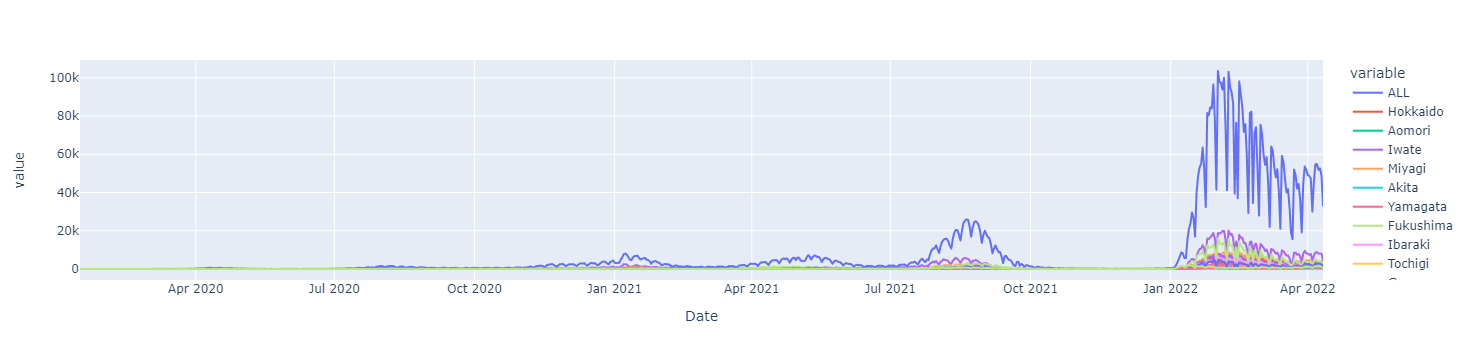

In [5]:
px.line(df, )

In [6]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(117, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-13,48868.857143,1525.714286,439.857143,234.000000,584.000000,191.000000,166.714286,375.142857,1409.714286,442.000000,...,266.000000,172.571429,1735.428571,290.285714,248.571429,631.571429,279.857143,220.857143,333.857143,649.000000
2022-03-20,42623.857143,1446.571429,427.142857,235.285714,513.571429,201.000000,124.571429,341.142857,1434.714286,429.857143,...,234.142857,146.142857,1425.428571,246.571429,205.000000,463.571429,218.285714,224.571429,326.285714,636.428571
2022-03-27,36901.571429,1451.285714,404.428571,202.285714,451.571429,207.428571,82.142857,335.714286,1089.000000,447.714286,...,214.857143,121.428571,1318.571429,205.142857,171.000000,333.857143,238.571429,197.142857,412.571429,723.000000
2022-04-03,44860.000000,1718.000000,436.285714,216.000000,565.142857,261.428571,182.285714,451.857143,1106.428571,616.714286,...,258.571429,134.000000,2066.285714,323.714286,257.714286,481.857143,370.285714,355.285714,682.000000,987.571429
2022-04-10,48409.571429,2073.857143,475.428571,325.285714,588.285714,303.000000,171.000000,573.142857,1282.571429,644.142857,...,293.142857,146.428571,2412.714286,371.571429,352.000000,609.000000,419.714286,515.285714,646.428571,1212.428571


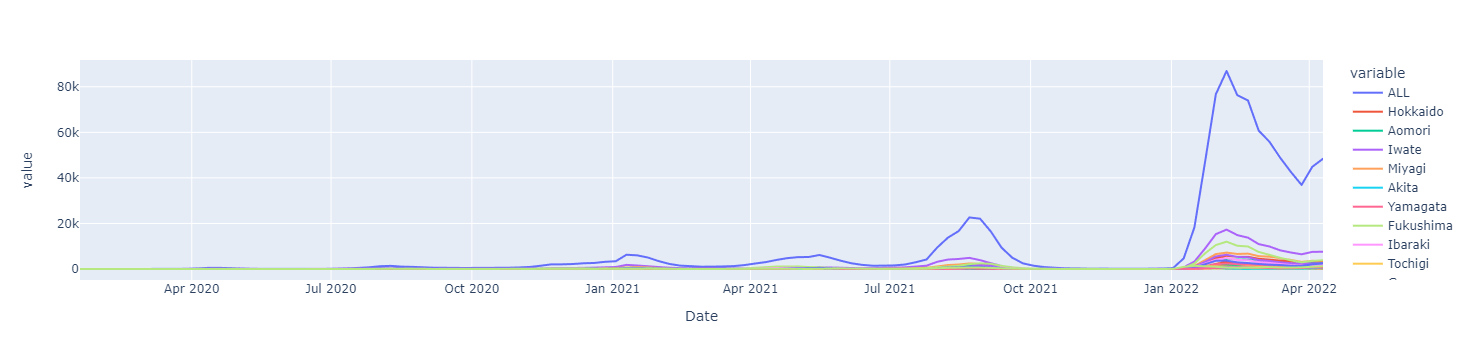

In [7]:
px.line(df_gr,)

## functions

In [8]:
import itertools

# 各パラメータの範囲を決める
p = d = q = range(1, 2)
P = D = Q = range(1, 2)
s = range(4, 32)

# p, d, q　の組み合わせを列挙するリストを作成
pdq = list(itertools.product(p, d, q))
# P, D, Q　の組み合わせを列挙するリストを作成すると同時に、後ろに　s = 12　を決め打ちでつけている。
PDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
#PDQs = [(x[0], x[1], x[2], x[3]) for x in list(itertools.product(P, D, Q, s))]

In [9]:
import warnings

warnings.filterwarnings("ignore") # warnings を表示させないようにする

def gridSearch(ts_train):
    best_params = [0, 0, 10000000]
    best_result = None
    for order in pdq:
        for seasonal_order in PDQs:
            try:
                model = SARIMAX(ts_train,
                              order = order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=True,
                              enforce_invertibility=True)

                result = model.fit(disp=False)

                if result.aic < best_params[2] and not result.aic < 100:
                    best_params = [order, seasonal_order, result.aic]
                    best_result = result
                    print('order{}, s_order{} - AIC: {}'.format(order, seasonal_order, result.aic))
            except KeyboardInterrupt:
                print('KeyboardInterrupt')
                return
            except:
                print('ERROR! Cannot fit! order{}, s_order{}'.format(order, seasonal_order))
                continue

    print('Best AIC model:', best_params)
    
    return best_result

In [10]:
%%time
result_all = gridSearch(df_gr.ALL)

order(1, 1, 1), s_order(1, 1, 1, 12) - AIC: 2004.2981943058176
Best AIC model: [(1, 1, 1), (1, 1, 1, 12), 2004.2981943058176]
CPU times: user 8.99 s, sys: 29.5 s, total: 38.5 s
Wall time: 3.55 s


In [11]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.ALL, order=order, seasonal_order=seasonal_order)
result_all = model.fit(disp=False)
result_all.aic

2004.2981943058176

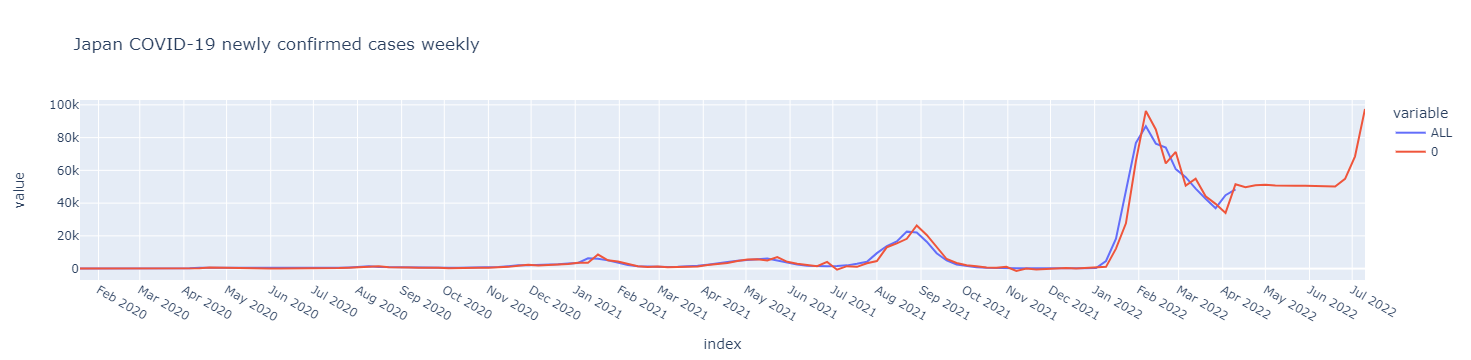

In [12]:
ts_forecast = result_all.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))

temp_df = df_gr.ALL.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])
fig = px.line(temp_df, title='Japan COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()

## SARIMA - Tokyo

In [13]:
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = SARIMAX(df_gr.Tokyo, order=order, seasonal_order=seasonal_order)
result_tokyo = model.fit(disp=False)
result_tokyo.aic

1679.137491462393

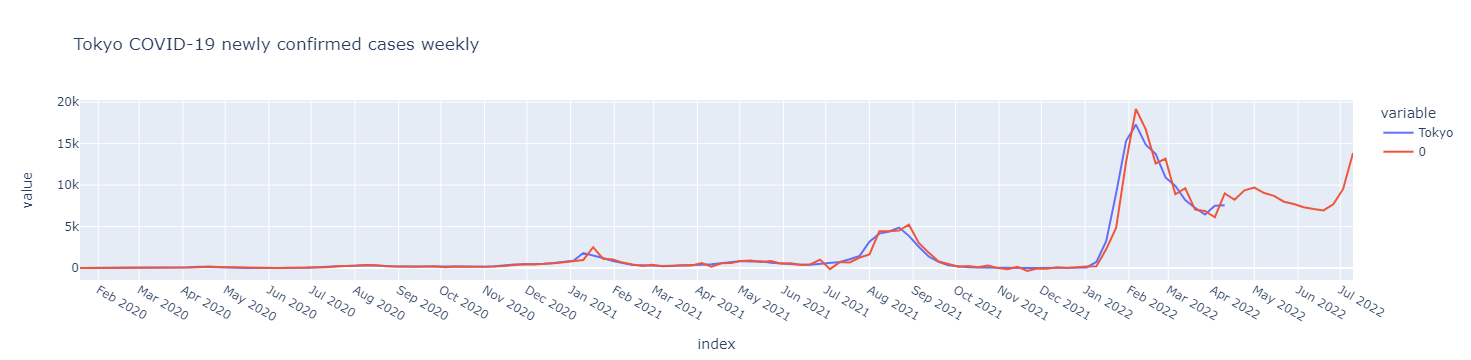

In [14]:
ts_forecast = result_tokyo.predict(start=df_gr.index[0], end=df_gr.index[-1]+relativedelta(months=3))
temp_df = df_gr.Tokyo.to_frame()
temp_df = pd.concat([temp_df, ts_forecast])

fig = px.line(temp_df, title='Tokyo COVID-19 newly confirmed cases weekly')
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()